In [1]:
import numpy as np

from archetypes.archetypes import ForageAgent, MountainMoveAgent
from feast_and_forage_env.game import Game
from feast_and_forage_env.simulator import Simulator

%load_ext autoreload
%autoreload 2

In [2]:
level = np.array([[1, 3, 2, 1, 0, 0, 0],
                  [2, 0, 0, 0, 2, 3, 0],
                  [2, 0, 0, 2, 1, 0, 0],
                  [0, 2, 4, 2, 0, 0, 0],
                  [0, 0, 2, 2, 3, 0, 0],
                  [0, 0, 5, 0, 0, 0, 0],
                  [0, 0, 2, 0, 0, 2, 0]], dtype=np.uint8)

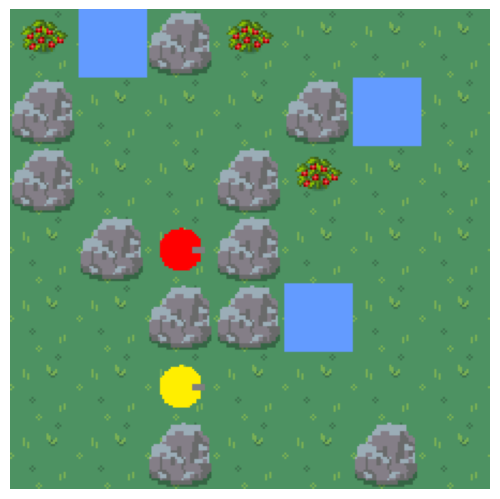

In [3]:
game = Game(level, ForageAgent, MountainMoveAgent)
game.plot_level()

#### Manually move

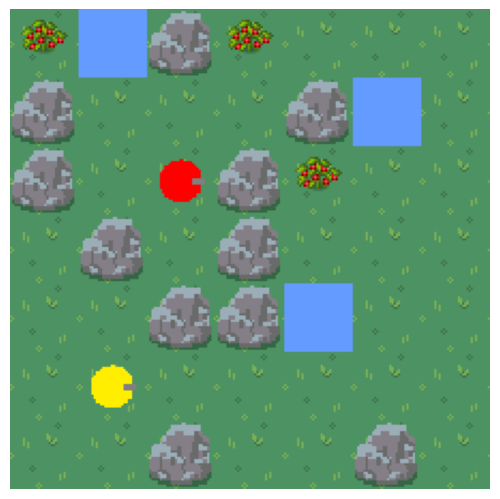

In [4]:
from feast_and_forage_env.enums import Move, PlayerID

# if no moves are specified, the next move is estimated by the specified he
moves = [{"player_id": PlayerID.PLAYER_1, "action": Move.UP}, {"player_id": PlayerID.PLAYER_2, "action": Move.LEFT}]
game.step(moves)
game.plot_level()

#### Get level, for processing with an heuristic for instance

In [5]:
game = Game(level, ForageAgent, MountainMoveAgent)
# game.initial_level
game.current_level

Level([[1, 3, 2, 1, 0, 0, 0],
       [2, 0, 0, 0, 2, 3, 0],
       [2, 0, 0, 2, 1, 0, 0],
       [0, 2, 0, 2, 0, 0, 0],
       [0, 0, 2, 2, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 2, 0]], dtype=uint8)

## Simulating multiple times to estimate the balance

In [6]:
sim = Simulator(level, ForageAgent, MountainMoveAgent)
# ranging from 0-1, 0.5 is best balanced.
print("Balance:", sim.run(n=10))

Balance: 0.7272727272727273
